In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_resultados = pd.read_csv('RESULTADOS_2024.csv', sep = ';', encoding = 'latin1')


In [3]:
# filtro para apenas no estado do Rio de Janeiro
df_resultados_rj = df_resultados.loc[df_resultados['SG_UF_ESC'] == 'RJ']
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332944 entries, 0 to 4332943
Data columns (total 42 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_SEQUENCIAL           int64  
 1   NU_ANO                  int64  
 2   CO_ESCOLA               float64
 3   CO_MUNICIPIO_ESC        float64
 4   NO_MUNICIPIO_ESC        object 
 5   CO_UF_ESC               float64
 6   SG_UF_ESC               object 
 7   TP_DEPENDENCIA_ADM_ESC  float64
 8   TP_LOCALIZACAO_ESC      float64
 9   TP_SIT_FUNC_ESC         float64
 10  CO_MUNICIPIO_PROVA      int64  
 11  NO_MUNICIPIO_PROVA      object 
 12  CO_UF_PROVA             int64  
 13  SG_UF_PROVA             object 
 14  TP_PRESENCA_CN          int64  
 15  TP_PRESENCA_CH          int64  
 16  TP_PRESENCA_LC          int64  
 17  TP_PRESENCA_MT          int64  
 18  CO_PROVA_CN             float64
 19  CO_PROVA_CH             float64
 20  CO_PROVA_LC             float64
 21  CO_PROVA_MT             float64

In [4]:
# eliminando as colunas dos gabaritos e respostas dos participantes
df_resultados_rj = df_resultados_rj.drop(columns = ['TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT'], axis = 1)
# eliminando as colunas dos codigos dos tipos de provas
df_resultados_rj = df_resultados_rj.drop(columns = ['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',], axis = 1)
# eliminando as colunas com os codigos do municipio da escola e codigo do estado da onde foi aplicado a prova
df_resultados_rj = df_resultados_rj.drop(columns = ['CO_MUNICIPIO_ESC', 'CO_UF_ESC'], axis = 1)
# eliminando a coluna do ano de quando foi aplicado a prova
df_resultados_rj = df_resultados_rj.drop(columns = ['NU_ANO'], axis = 1)
df_resultados_rj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97876 entries, 188 to 4332942
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_SEQUENCIAL           97876 non-null  int64  
 1   CO_ESCOLA               97876 non-null  float64
 2   NO_MUNICIPIO_ESC        97876 non-null  object 
 3   SG_UF_ESC               97876 non-null  object 
 4   TP_DEPENDENCIA_ADM_ESC  97876 non-null  float64
 5   TP_LOCALIZACAO_ESC      97876 non-null  float64
 6   TP_SIT_FUNC_ESC         97876 non-null  float64
 7   CO_MUNICIPIO_PROVA      97876 non-null  int64  
 8   NO_MUNICIPIO_PROVA      97876 non-null  object 
 9   CO_UF_PROVA             97876 non-null  int64  
 10  SG_UF_PROVA             97876 non-null  object 
 11  TP_PRESENCA_CN          97876 non-null  int64  
 12  TP_PRESENCA_CH          97876 non-null  int64  
 13  TP_PRESENCA_LC          97876 non-null  int64  
 14  TP_PRESENCA_MT          97876 non-null 

In [ ]:
# Criando uma COLUNA com a nota media total do enem de cada inscrito
df_resultados_rj['NOTA_MEDIA'] = df_resultados_rj[['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis = 1)
df_resultados_rj['NOTA_MEDIA'].sort_values(ascending= False)

239109     832.76
3456351    830.74
2006814    823.74
898009     823.50
234540     823.12
            ...  
4331766       NaN
4332430       NaN
4332511       NaN
4332846       NaN
4332942       NaN
Name: NOTA_MEDIA, Length: 97876, dtype: float64

In [54]:
# dados da media das notas totais

# Calculo das medidas de tendencias centrais
def tendencia_central (a):
    # formula 'nanmean' e 'nanmedian' para ignorar os valores NaN e fazer os calculos
    media_notas= np.nanmean(a)
    mediana_notas= np.nanmedian(a)
    distancia_notas= ((media_notas - mediana_notas)/mediana_notas)*100
    print(f"Média: {media_notas:.2f}\nMediana: {mediana_notas:.2f}\nDistancia: {distancia_notas:.2f}% ")
    return

def outliers (b):
    # determinando os quartis, usando a formula 'nanpercertile' para ignorar os valores NaN e fazer os calculos
    q1, q2, q3= np.nanpercentile(b , [25, 50, 75])
    iqr = q3 - q1
    limite_superior_notas = q3 + (1.5 * iqr)
    limite_inferior_notas = q1 - (1.5 * iqr)           
    print(f"Quartis\nQ1: {q1:.2f}\nQ2: {q2:.2f}\nQ3: {q3:.2f}\nValores de corte:\nLimite superior: {limite_superior_notas:.2f}\nLimite inferior: {limite_inferior_notas:.2f}")
    return limite_inferior_notas, limite_superior_notas

tendencia_central(df_resultados_rj['NOTA_MEDIA'])
limite_inferior_notas, limite_superior_notas = outliers (np.array(df_resultados_rj['NOTA_MEDIA']))

Média: 543.23
Mediana: 540.48
Distancia: 0.51% 
Quartis
Q1: 478.40
Q2: 540.48
Q3: 612.74
Valores de corte:
Limite superior: 814.24
Limite inferior: 276.90


In [52]:
#filtrando (pelo corte do quartil) os outliers +75
maior_25_enem = df_resultados_rj.loc[df_resultados_rj['NOTA_MEDIA'] >= limite_superior_notas]
#exibindo apenas as colunas especificas para analise
maior_25_enem = maior_25_enem[['NU_SEQUENCIAL', 'NOTA_MEDIA']].sort_values(by='NOTA_MEDIA', ascending=False).head()
maior_25_enem

,NU_SEQUENCIAL,NOTA_MEDIA
239109,2063342,832.76
3456351,2216069,830.74
2006814,464974,823.74
898009,1944168,823.50
234540,1984106,823.12


In [51]:
#filtrando (pelo corte do quartil) os outliers -25
menor_25_enem = df_resultados_rj.loc[df_resultados_rj['NOTA_MEDIA'] <= limite_inferior_notas]
# retirando todas as provas zeradas
menor_25_enem = menor_25_enem[menor_25_enem['NOTA_MEDIA'] != 0]
# exibindo apenas as colunas especificas para analise
menor_25_enem = menor_25_enem[['NU_SEQUENCIAL', 'NOTA_MEDIA']].sort_values(by='NOTA_MEDIA', ascending=False).tail(5)
menor_25_enem

,NU_SEQUENCIAL,NOTA_MEDIA
2435588,2832646,105.633333
3118400,1679793,104.600000
2084639,3391920,101.300000
1177971,3085603,101.300000
1110219,4167051,68.440000


In [55]:
# dados das notas de ciencias da natureza

tendencia_central(df_resultados_rj['NU_NOTA_CN'])
limite_inferior_notas, limite_superior_notas = outliers(np.array(df_resultados_rj['NU_NOTA_CN']))

Média: 497.99
Mediana: 494.10
Distancia: 0.79% 
Quartis
Q1: 434.70
Q2: 494.10
Q3: 555.70
Valores de corte:
Limite superior: 737.20
Limite inferior: 253.20


In [56]:
# dados das notas de ciencias humanas

tendencia_central(df_resultados_rj['NU_NOTA_CH'])
limite_inferior_notas, limite_superior_notas = outliers(np.array(df_resultados_rj['NU_NOTA_CH']))

Média: 517.32
Mediana: 523.00
Distancia: -1.09% 
Quartis
Q1: 454.10
Q2: 523.00
Q3: 581.40
Valores de corte:
Limite superior: 772.35
Limite inferior: 263.15


In [57]:
# dados das notas de linguagens e codigos

tendencia_central(df_resultados_rj['NU_NOTA_LC'])
limite_inferior_notas, limite_superior_notas = outliers(np.array(df_resultados_rj['NU_NOTA_LC']))

Média: 530.29
Mediana: 536.80
Distancia: -1.21% 
Quartis
Q1: 492.60
Q2: 536.80
Q3: 576.50
Valores de corte:
Limite superior: 702.35
Limite inferior: 366.75


In [59]:
# dados das notas de linguagens e codigos - ingles (0)

# Agrupando todas as notas de ingles
df_notas_ing = df_resultados_rj.loc[df_resultados_rj['TP_LINGUA'] == 0]

tendencia_central(df_notas_ing['NU_NOTA_LC'])
limite_inferior_notas, limite_superior_notas = outliers(np.array(df_notas_ing['NU_NOTA_LC']))


Média: 542.95
Mediana: 549.70
Distancia: -1.23% 
Quartis
Q1: 507.50
Q2: 549.70
Q3: 587.20
Valores de corte:
Limite superior: 706.75
Limite inferior: 387.95


In [60]:
# dados das notas de linguagens e codigos - espanhol (1)

# Agrupando todas as notas de espanhol
df_notas_esp = df_resultados_rj.loc[df_resultados_rj['TP_LINGUA'] == 1]

tendencia_central(df_notas_esp['NU_NOTA_LC'])
limite_inferior_notas, limite_superior_notas = outliers(np.array(df_notas_esp['NU_NOTA_LC']))

Média: 500.37
Mediana: 508.20
Distancia: -1.54% 
Quartis
Q1: 463.80
Q2: 508.20
Q3: 544.40
Valores de corte:
Limite superior: 665.30
Limite inferior: 342.90


In [62]:
# dados das notas de matematica

tendencia_central(df_resultados_rj['NU_NOTA_MT'])
limite_inferior_notas, limite_superior_notas = outliers(np.array(df_resultados_rj['NU_NOTA_MT']))

Média: 538.11
Mediana: 513.80
Distancia: 4.73% 
Quartis
Q1: 437.00
Q2: 513.80
Q3: 626.82
Valores de corte:
Limite superior: 911.56
Limite inferior: 152.26


In [63]:
# dados das notas da redação

tendencia_central(df_resultados_rj['NU_NOTA_REDACAO'])
limite_inferior_notas, limite_superior_notas = outliers(np.array(df_resultados_rj['NU_NOTA_REDACAO']))

Média: 639.94
Mediana: 660.00
Distancia: -3.04% 
Quartis
Q1: 540.00
Q2: 660.00
Q3: 800.00
Valores de corte:
Limite superior: 1190.00
Limite inferior: 150.00


C:\Users\morat\AppData\Local\Temp\ipykernel_15196\1700578644.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(notas, labels=['Ciencias Humanas', 'Ciencias da Natureza', 'Lingua e Codigos (Total)', 'Lingua e Codigos (Espanhol)', 'Lingua e Codigos (Ingles)','Matemática', 'Redação'], vert = False)


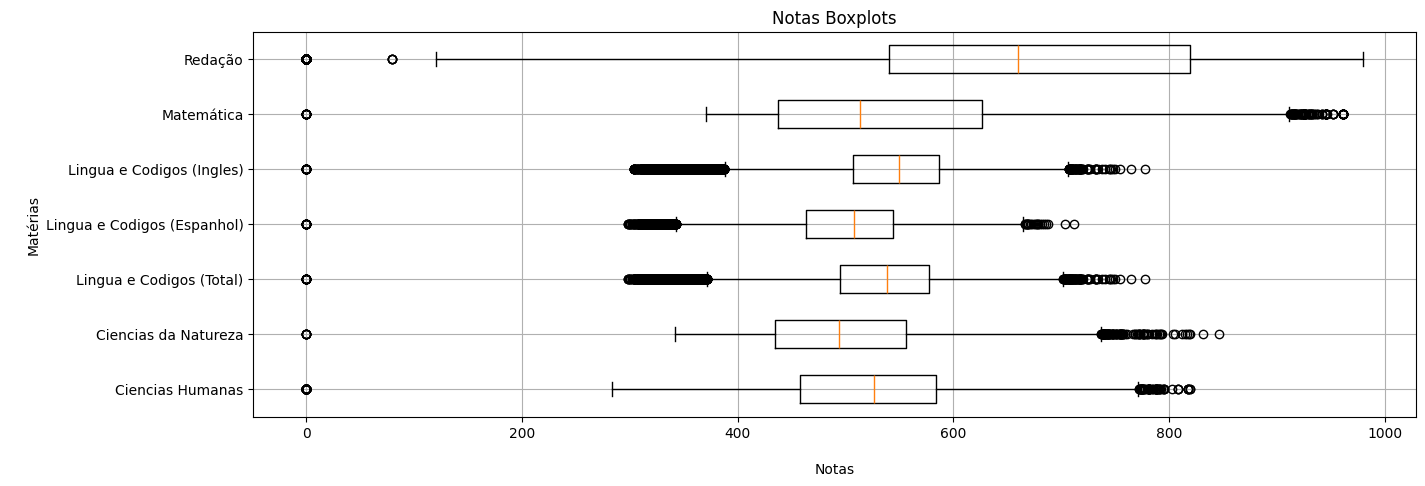

In [64]:
# criando boxplot em comparação para cada um das notas
# sintaxe para retirar os NaN das notas para que possamos exibi-las
data = df_resultados_rj.dropna(subset=['NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])
data2 = df_notas_esp.dropna(subset= ['NU_NOTA_LC'])
data3 = df_notas_ing.dropna(subset= ['NU_NOTA_LC'])
#criando uma variavel para alocar para que possamos exibir no boxplot
notas = data['NU_NOTA_CH'],data['NU_NOTA_CN'], data['NU_NOTA_LC'], data2 ['NU_NOTA_LC'], data3 ['NU_NOTA_LC'], data['NU_NOTA_MT'], data['NU_NOTA_REDACAO'],
#definindo o tamanho do boxplot
fig, axs = plt.subplots(figsize=(15, 5))
# Creates grouped boxplots
plt.boxplot(notas, labels=['Ciencias Humanas', 'Ciencias da Natureza', 'Lingua e Codigos (Total)', 'Lingua e Codigos (Espanhol)', 'Lingua e Codigos (Ingles)','Matemática', 'Redação'], vert = False)
plt.title('Notas Boxplots')
plt.ylabel('\nMatérias')
plt.xlabel('\nNotas')
plt.grid(True)
plt.show()

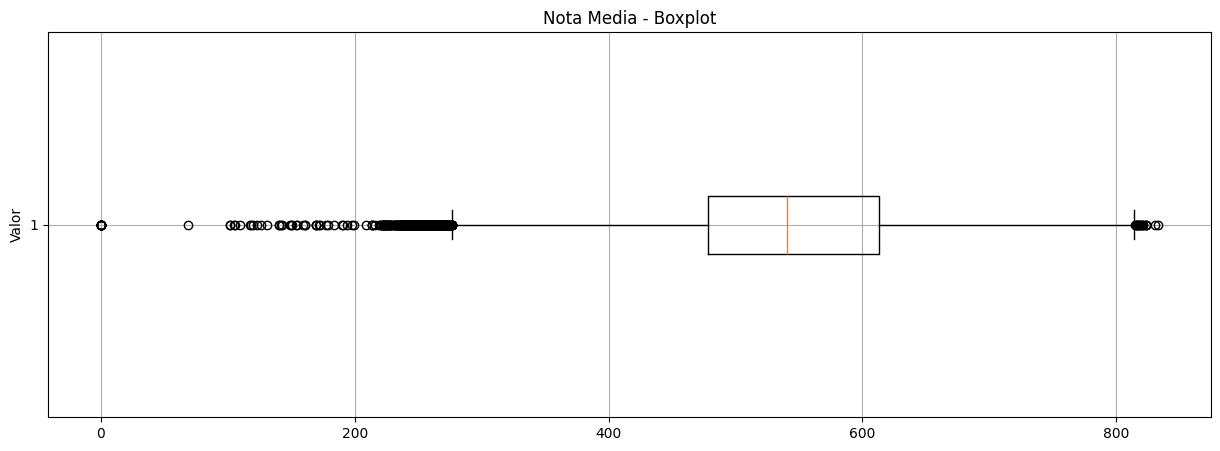

In [65]:
# analise boxplot da nota media por inscrição

data4 = df_resultados_rj.dropna(subset=['NOTA_MEDIA'])
data4 = data4['NOTA_MEDIA']
fig, axs = plt.subplots(figsize=(15, 5))
plt.boxplot(data4, vert = False)
plt.title('Nota Media - Boxplot')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

In [ ]:
# transformando o Data Frame tratado para csv (para utilizar no power bi e analisar com  graficos)
#df_resultados_rj.to_csv('Dados Provas Enem 2024 - RJ 2.csv', sep=';', index = False)